In [120]:
#Softmax 실습
#Softmax는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아
#각 클래스에 대한 확률을 추정하는 것이다
import math
from math import e # e : lnx(오일러 상수)

import torch

In [121]:
print("Eulers constant", e)

Eulers constant 2.718281828459045


In [122]:
input_softmax = torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0])
torch_e = torch.tensor(e)

In [123]:
input_softmax

tensor([1., 2., 3., 4., 5., 6.])

In [124]:
denominator = torch.sum(torch.pow(torch_e, input_softmax)) # 분모
denominator

tensor(636.6328)

In [125]:
numerator = torch.pow(torch_e, input_softmax) #분자
numerator

tensor([  2.7183,   7.3891,  20.0855,  54.5981, 148.4131, 403.4287])

In [126]:
#분자 나누기 분모를 한다. 그러면 softmax 계산식이 나온다.
softmax_output = numerator / denominator
softmax_output

tensor([0.0043, 0.0116, 0.0315, 0.0858, 0.2331, 0.6337])

In [127]:
#Softmax uning pytorch
softmax_function = torch.nn.Softmax(dim=0)
softmax_function(input_softmax) # 위 계산과 같은 값이 나옴

tensor([0.0043, 0.0116, 0.0315, 0.0858, 0.2331, 0.6337])

In [128]:
###MNIST 분석 시간!
import numpy as np
import matplotlib.pyplot as plt
import random

In [129]:
from torchvision import datasets
import torchvision.transforms as transforms #데이터를 어떤 형식으로 갖고 올지 알려줌

In [130]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device) #cuda 가 없으면 cpu로

random.seed(777) #랜덤값 섞어줌
torch.manual_seed(777)
if device == 'cpu': #나는 cuda 없어서 cpu로 한거
    torch.cuda.manual_seed_all(777)
    

cpu


In [131]:
# transform.ToTensor() : data type 을 torch.FloatTensor 로 바꾸어줌
train_data = datasets.MNIST(root='./image.data/MNIST', train=True, download=True, transform = transforms.ToTensor())
test_data = datasets.MNIST(root='./image.data/MNIST', train=True, download=True, transform = transforms.ToTensor())

In [132]:
#prepare date loaders
batch_size=1000

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1000) # batch 사이즈 별로 데이터를 나누어 줄 때 사용
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000)

In [133]:
#get image
for batch_idx, image in enumerate(train_loader):
    sample_image = image[0].reshape(batch_size, 28,28).to(device)
    break

In [134]:
sample_image[0].shape

torch.Size([28, 28])

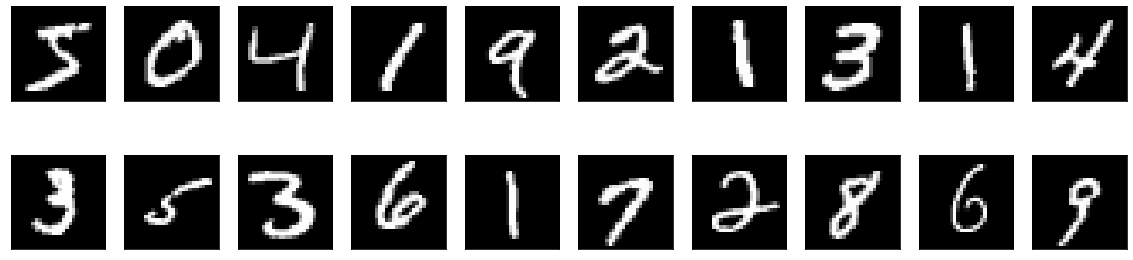

In [135]:
n = 20 #몇개를 보일 것인가
plt.figure(figsize=(20,5)) # 전체 figure 들의 총행, 열의 크기

for i in range(n):
    #original Data
    # = plt.subplot(행의 갯수, 열의 갯수, index)
    ax = plt.subplot(2,10,i+1) #2줄 10개로 만든다.
    
    test_img = sample_image[i].to(device) #100개 단위로 출력
    plt.imshow(test_img.cpu(), cmap='gray')
    #지금 우리 데이터는 cuda에 올라가있는데 gpu 메모리에 있으므로 cpu로 바꿔주어야 한다
    #cpu로 바꿔야 이미지가 나온다.
    
    ax.get_xaxis().set_visible(False) #이미지 옆에 숫자를 없애줌
    ax.get_yaxis().set_visible(False)

In [136]:
sample_image[0].shape

torch.Size([28, 28])

In [137]:
sample_image[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [193]:
# 뉴럴 layer 설정
linear1 = torch.nn.Linear(784, 256)
linear2 = torch.nn.Linear(256,64)
linear3 = torch.nn.Linear(64,10)

In [194]:
#Sequential 을 이용해 model 설정
# 위의 뉴럴 layer들을 가지고 온다.
model = torch.nn.Sequential(linear1, linear2, linear3).to(device)
#model 도 gpu에 올려주어야 한다.
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Linear(in_features=256, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=10, bias=True)
)

In [195]:
epoch = 15 #epoch는 전체 데이터셋에 대해 한 번 학습을 완료한 상태이다
learning_rate = 0.01

In [196]:
#CrossEntropyLoss 내에 Softmax function 이 포함되어 있으므로 따로 설정해줄 필요없다.
loss_function = torch.nn.CrossEntropyLoss()

In [197]:
#먼저 optimizer 는 SGD로 설정
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [198]:
for batch_idx, (x_data, y_label) in enumerate(train_loader):
    print(batch_idx+1) 
#mini batch 사이즈가 1000, train 데이터 개수가 총 6만이므로 배치는 총 60개가 생긴다

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [199]:
loss_list = []
for num_epoch in range(epoch):
    average_loss = 0
    # 배치가 하나 훈련이 될 때마다 배치에 대한 CrossEntropyLoss가 생기는데 이 Loss를 누적해서
    # 더한 다음에 배치 하나가 전체를 한 번 돌면 60으로 나누어서 평균 loss를 구한다.
    
    #
    for batch_idx,(x_data, y_label) in enumerate(train_loader):
        input_image = x_data.reshape(-1, 28*28).to(device) #dpu 위에 올려준다(dpu를 계산할거기 때문에)
        label = y_label
        
        optimizer.zero_grad() #기울기 0으로 초기화
        y_predict = model(input_image) # 실제로 model 안에 이미지 넣는다.
        
        #loss 도 gpu 위에 올려주어야 한다.
        loss = loss_function(y_predict, label.type(torch.LongTensor))
        #예상값과 실제값을 CrossEntropy로 차이를 구한다
        
        if (batch_idx+1) % 20 == 0: #batch가 20으로 나누어 떨어지는데 그 때마다 loss가 어떻게 되는지 확인
            print("{}th mini-batch loss = {:.3}".format((batch_idx+1), loss.item()))
            
        loss.backward()
        optimizer.step() #weight 값 업데이트
        
        average_loss = average_loss + (loss.item()/60) #epoch 하나의 평균 loss를 구함
        #60은 mini-batch 개수
        loss_list.append(loss.cpu().detach().numpy())
        
        #epoch 마다 평균 loss 값을 print
    print("Epoch = {}\tAverage loss = {:.3}\n".format((num_epoch+1), average_loss))

20th mini-batch loss = 2.28
40th mini-batch loss = 2.24
60th mini-batch loss = 2.2
Epoch = 1	Average loss = 2.26

20th mini-batch loss = 2.16
40th mini-batch loss = 2.13
60th mini-batch loss = 2.07
Epoch = 2	Average loss = 2.15

20th mini-batch loss = 2.02
40th mini-batch loss = 1.99
60th mini-batch loss = 1.91
Epoch = 3	Average loss = 2.01

20th mini-batch loss = 1.85
40th mini-batch loss = 1.82
60th mini-batch loss = 1.71
Epoch = 4	Average loss = 1.84

20th mini-batch loss = 1.65
40th mini-batch loss = 1.62
60th mini-batch loss = 1.48
Epoch = 5	Average loss = 1.65

20th mini-batch loss = 1.43
40th mini-batch loss = 1.41
60th mini-batch loss = 1.26
Epoch = 6	Average loss = 1.43

20th mini-batch loss = 1.23
40th mini-batch loss = 1.23
60th mini-batch loss = 1.06
Epoch = 7	Average loss = 1.24

20th mini-batch loss = 1.06
40th mini-batch loss = 1.08
60th mini-batch loss = 0.904
Epoch = 8	Average loss = 1.08

20th mini-batch loss = 0.923
40th mini-batch loss = 0.957
60th mini-batch loss =

In [200]:
#Test
#test data 는 gradient를 계산할 필요가 없다
with torch.no_grad():
    correct = 0 # 맞는 것의 개수를 count
    
    for batch_idx, (x_data, y_label) in enumerate(test_loader):
        input_image = x_data.reshape(-1,784).to(device)
        label = y_label.to(device)
        
        outputs = model(input_image)
        outputs_softmax = torch.nn.functional.softmax(outputs, dim=1) #softmax 가져오는 방법
        break


In [201]:
outputs_softmax[0]

tensor([4.6739e-02, 1.5875e-03, 1.0201e-02, 5.7961e-01, 5.4428e-04, 2.8229e-01,
        2.9355e-03, 1.6699e-03, 7.0798e-02, 3.6246e-03])

In [202]:
#torch.argmax : 어떤 인덱스에 있는 값이 가장 큰 것인지를 알려준다.
torch.argmax(outputs_softmax[0], dim=0)

tensor(3)

In [203]:
outputs_softmax[0]

tensor([4.6739e-02, 1.5875e-03, 1.0201e-02, 5.7961e-01, 5.4428e-04, 2.8229e-01,
        2.9355e-03, 1.6699e-03, 7.0798e-02, 3.6246e-03])

In [204]:
#Test
with torch.no_grad():
    correct = 0 # 맞는 것의 개수를 count
    
    for batch_idx, (x_data, y_label) in enumerate(test_loader):
        input_image = x_data.reshape(-1,784).to(device)
        label = y_label.to(device)
        
        outputs = model(input_image)
        outputs_softmax = torch.nn.functional.softmax(outputs, dim=1) #softmax 가져오는 방법
        
        predicted = torch.argmax(outputs_softmax, dim=1)
        # 정답과 맞는지 확인
        # 맞는 것의 개수를 확인
        answer = sum(label == predicted).item() # 같다면 더한다. 같은 것은 1로 취급하여 더해진다.
        
        correct = correct + answer
        
    print("맞춘 개수 -> ",correct)
    #test 데이터는 총 10,000개
    print("SGD를 이용한 모델의 정확도는 {:.2f}%".format((correct/10000)*100))


맞춘 개수 ->  50956
SGD를 이용한 모델의 정확도는 509.56%


In [205]:
#판단 방법
print("Softmax\n", outputs_softmax[0].cpu().numpy())

Softmax
 [1.4886494e-02 8.4347375e-05 2.4119375e-02 3.8910325e-04 4.4541378e-02
 7.6474221e-03 8.9538664e-01 2.9023943e-04 5.8149067e-03 6.8400688e-03]


예측한 숫자는 6이다


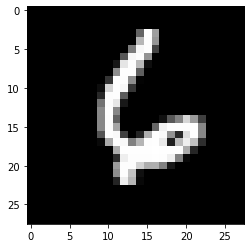

In [206]:
print("예측한 숫자는 {}이다".format(predicted[0]))
plt.imshow(x_data[0].cpu().reshape(28,28), cmap='gray')